# Relatório Intermediário

Gabriella Cukier

### Bibliotecas

In [1]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

### Funções utilizadas

In [2]:
def roda_com_entrada(executavel, arquivo_in):
    with open(arquivo_in) as f:
        start = time.perf_counter()
        proc = subprocess.run([f"./exe/{executavel}"], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
        
        return(proc.stdout, (end - start))

In [3]:
def gera_resultados(path, arquivos, executaveis):
    dic={}
    for executavel in executaveis:
        dic[executavel] = {
            "results": None,
            "times" : None
        }
        results=[]
        times=[]
        
        print(executavel)
        for arquivo_in in arquivos:

            desempenho = roda_com_entrada(executavel, f"{path}/{arquivo_in}")
            results.append(desempenho[0])
            times.append(desempenho[1])
            
            print(arquivo_in)

        dic[executavel]["results"] = results
        dic[executavel]["times"] = times
    return dic

In [4]:
def multi_df(dic):
    # https://www.geeksforgeeks.org/nested-dictionary-to-multiindex-dataframe/
    reformed_dict = {}
    for outerKey, innerDict in dic.items():
        for innerKey, values in innerDict.items():
            reformed_dict[(outerKey,
                           innerKey)] = values

    multiIndex_df = pd.DataFrame(reformed_dict)
    return multiIndex_df

## Resultados: Busca Exaustiva

#### Metodologia da comparação

Como a estratégia da busca exaustiva consiste em testar todas as possibilidades possíveis e assim achar uma solução ótima global, ela tende a ser mais compuacionalmente custosa. Desta forma, para fins de teste de desempenho, foi utilizado um intervalo com valores mais baixos referentes ao tamanho da sequência.

Para comparar os desempenhos entre as implementações descritas anteriormente, foram criadas 10 entradas diferentes, com o valor inicial do tamanho da sequência começando em 1 e aumentando de 10 em 10.

Os respectivos resultados de cada programa foram salvos em um dataframe, assim como os tempos de execução correspondentes. Por fim, foram elaborados gráficos comparativos e seus resultados analisados

##### Rodando os executáveis com cada arquivo de entrada

In [8]:
executaveis = ["busca_exaustiva_smith_waterman", "exaustiva-paralela"]
arquivos=[]
for i in range(5):
    arquivos.append(f"dna{i}.seq")

##### Criando um Dataframe

In [9]:
dic = gera_resultados("in_exaustiva", arquivos, executaveis)

busca_exaustiva_smith_waterman
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
exaustiva-paralela
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq


In [10]:
df = pd.DataFrame(dic)
df

,busca_exaustiva_smith_waterman,exaustiva-paralela
results,"[0, 6, 13, 18, 28]","[0, 6, 13, 18, 28]"
times,"[0.006782581999686954, 0.011759605000406737, 0...","[0.005327550999936648, 0.007441298999765422, 0..."


In [11]:
multiIndex_df = pd.DataFrame(multi_df(dic))
multiIndex_df

busca_exaustiva_smith_waterman           exaustiva-paralela          
                         results     times            results     times
0                              0  0.006783                  0  0.005328
1                              6  0.011760                  6  0.007441
2                             13  0.072665                 13  0.048729
3                             18  0.505267                 18  0.271681
4                             28  2.451480                 28  1.179737

--------

In [12]:
executaveis = ["busca_exaustiva_smith_waterman", "exaustiva-paralela"]
arquivos=[]
for i in range(10):
    arquivos.append(f"dna{i}.seq")
    
dic = gera_resultados("in_exaustiva", arquivos, executaveis)

busca_exaustiva_smith_waterman
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq
exaustiva-paralela
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq


In [13]:
df = pd.DataFrame(dic)
df

,busca_exaustiva_smith_waterman,exaustiva-paralela
results,"[0, 6, 13, 18, 28, 27, 35, 43, 42, 56]","[0, 6, 13, 18, 28, 27, 35, , , ]"
times,"[0.006344452000121237, 0.008693020999999135, 0...","[0.006979954000598809, 0.006168786000671389, 0..."


In [14]:
multiIndex_df = pd.DataFrame(multi_df(dic))
multiIndex_df

busca_exaustiva_smith_waterman             exaustiva-paralela           
                         results       times            results      times
0                              0    0.006344                  0   0.006980
1                              6    0.008693                  6   0.006169
2                             13    0.069928                 13   0.047456
3                             18    0.507133                 18   0.287081
4                             28    2.415662                 28   1.154185
5                             27    8.369848                 27   3.669687
6                             35   23.209726                 35  11.584866
7                             43   59.443239                      9.908092
8                             42  124.461274                      5.557961
9                             56  255.860515                      4.831604

--------

In [16]:
executaveis = ["exaustiva-paralela"]
arquivos=[]
for i in range(20):
    arquivos.append(f"dna{i}.seq")
    
dic = gera_resultados("in_exaustiva_maior", arquivos, executaveis)

exaustiva-paralela
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq
dna10.seq
dna11.seq
dna12.seq
dna13.seq
dna14.seq
dna15.seq
dna16.seq
dna17.seq
dna18.seq
dna19.seq


In [17]:
dic = gera_resultados("in_exaustiva_maior", arquivos, executaveis)

exaustiva-paralela
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq
dna10.seq
dna11.seq
dna12.seq
dna13.seq
dna14.seq
dna15.seq
dna16.seq
dna17.seq
dna18.seq
dna19.seq


In [18]:
df = pd.DataFrame(dic)
df

,exaustiva-paralela
results,"[3, 9, 11, 15, 20, 20, 20, 28, 26, 26, 28, , 3..."
times,"[0.015890626999862434, 0.006829208000453946, 0..."


In [19]:
multiIndex_df = pd.DataFrame(multi_df(dic))
multiIndex_df

exaustiva-paralela           
              results      times
0                   3   0.015891
1                   9   0.006829
2                  11   0.015941
3                  15   0.045933
4                  20   0.118322
5                  20   0.372656
6                  20   0.783910
7                  28   1.450659
8                  26   2.689313
9                  26   4.312281
10                 28   7.090656
11                     13.209173
12                 36  19.755437
13                     12.685971
14                      4.229911
15                      7.411507
16                      5.458702
17                      5.877116
18                      4.788993
19                      7.543889

##### Gráfico da comparação de tempo

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

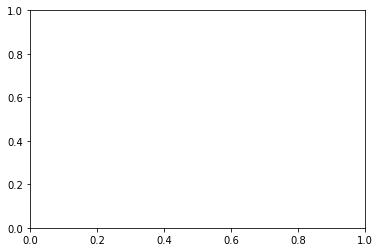

In [32]:
valores=[1]
for i in range (1,10):
    valores.append(valores[i-1]+10)

for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["times"].values, label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("tempo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do tempo em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

##### Gráfico da comparação de valores

In [ ]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["results"].values.astype(float), label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("valor máximo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do valor máximo encontrado em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

### Análise e conclusões